In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
plt.style.use('ggplot')


In [2]:
profiles = pd.read_json('../data/raw/profile.json')
offers = pd.read_json('../data/raw/offers.json')
transactions = pd.read_json('../data/raw/transactions.json')

In [3]:
# Profiles
profiles['registered_on'] = pd.to_datetime(profiles['registered_on'], format='%Y%m%d')
today = pd.Timestamp('2018-07-27')

profiles['days_since_register'] = (
    today - pd.to_datetime(profiles['registered_on'])
).dt.days.clip(lower=0).astype('Int64')
profiles['months_since_register'] = profiles['days_since_register'] / 30

# Offers
offers['category'] = offers.index

# Transactions
for idx, item in transactions.iterrows():
    value_dict = item.value
    item.value['offer_id'] = value_dict['offer_id'] if value_dict['offer_id'] else value_dict['offer id']
    item.value.pop('offer id', None)

expanded = pd.DataFrame(transactions['value'].tolist())
transactions = pd.concat([transactions, expanded], axis=1)
transactions = transactions.drop('value', axis=1)


# Profiles

- age (int): idade do cliente na criação da conta
- registeredon (int): data de criação da conta
- gender (string): gênero do cliente
- id (string): id do cliente
- credit_card_limit (float): limite do cartão registrado

**Perguntas**

- temos quantos usuários únicos?
- qual a distribuição das idades, gênero e limite no cartão?

In [4]:
profiles.head()

,age,registered_on,gender,id,credit_card_limit,days_since_register,months_since_register
0,118,2017-02-12,None,68be06ca386d4c31939f3a4f0e3dd783,NaN,530,17.666667
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,377,12.566667
2,118,2018-07-12,None,38fe809add3b4fcf9315a9694bb96ff5,NaN,15,0.5
3,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,444,14.8
4,118,2017-08-04,None,a03223e636434f42ac4c3df47e8bac43,NaN,357,11.9


In [5]:
duplicate_ids = profiles['id'].duplicated().sum()
if duplicate_ids > 0:
    print(f"There are {duplicate_ids} duplicate IDs in the 'id' column.")
else:
    print("There are no duplicate IDs in the 'id' column.")

print(f'Number of users: {int(profiles.id.count())}')


There are no duplicate IDs in the 'id' column.
Number of users: 17000


### Age

count    17000.000000
mean        62.531412
std         26.738580
min         18.000000
25%         45.000000
50%         58.000000
75%         73.000000
max        118.000000
Name: age, dtype: float64


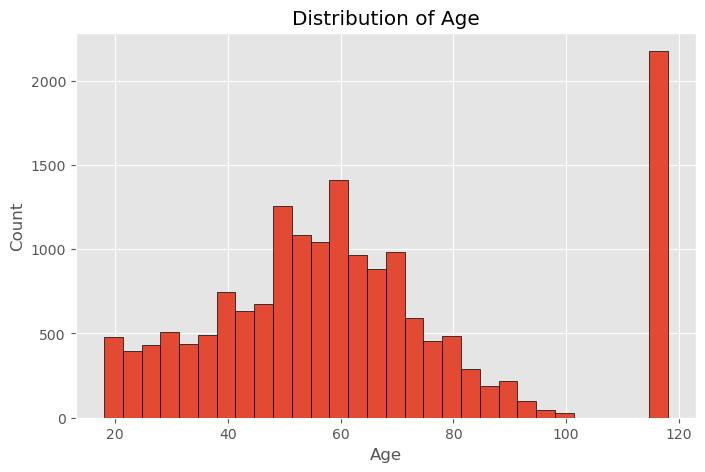

In [6]:
print(profiles.age.describe())

plt.figure(figsize=(8, 5))
profiles['age'].hist(bins=30, edgecolor='black', zorder=3)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

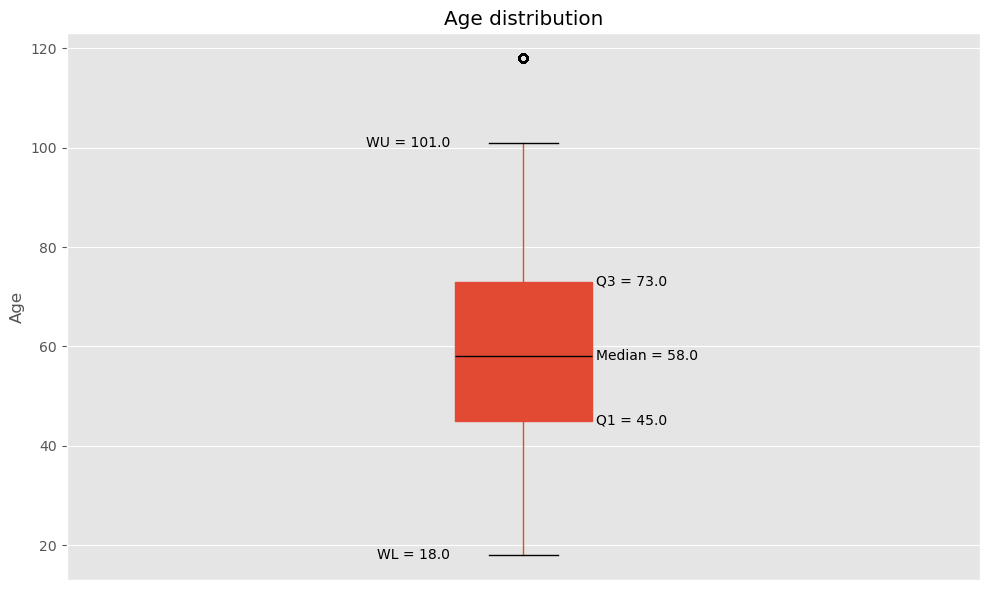

In [7]:
s = profiles['age'].dropna()
q1, med, q3 = s.quantile([0.25, 0.5, 0.75])
iqr = q3 - q1
lower_whisker = s[s >= q1 - 1.5 * iqr].min()
upper_whisker = s[s <= q3 + 1.5 * iqr].max()

fig, ax = plt.subplots(figsize=(10, 6))
profiles.boxplot(
    column='age',
    ax=ax,
    patch_artist=True,
    medianprops=dict(color='black'),
)

x = 1
dx = 0.08

ax.text(x + dx, q1, f"Q1 = {q1:.1f}", va='center')
ax.text(x + dx, med, f"Median = {med:.1f}", va='center')
ax.text(x + dx, q3, f"Q3 = {q3:.1f}", va='center')
ax.text(x - dx, lower_whisker, f"WL = {lower_whisker:.1f}", va='center', ha='right')
ax.text(x - dx, upper_whisker, f"WU = {upper_whisker:.1f}", va='center', ha='right')

plt.title('Age distribution')
plt.xticks([]) 
plt.ylabel('Age')

plt.tight_layout()
plt.show()

### Gender

count     14825
unique        3
top           M
freq       8484
Name: gender, dtype: object


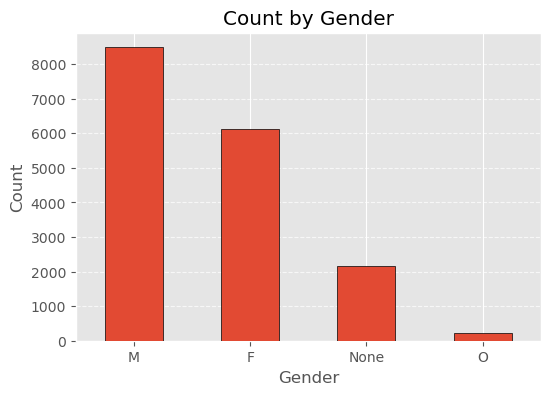

In [8]:
print(profiles.gender.describe())

gender_counts = profiles['gender'].value_counts(dropna=False)
plt.figure(figsize=(6, 4))
gender_counts.plot(kind='bar', edgecolor='black', zorder=3)
plt.title('Count by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7, zorder=0)
plt.show()


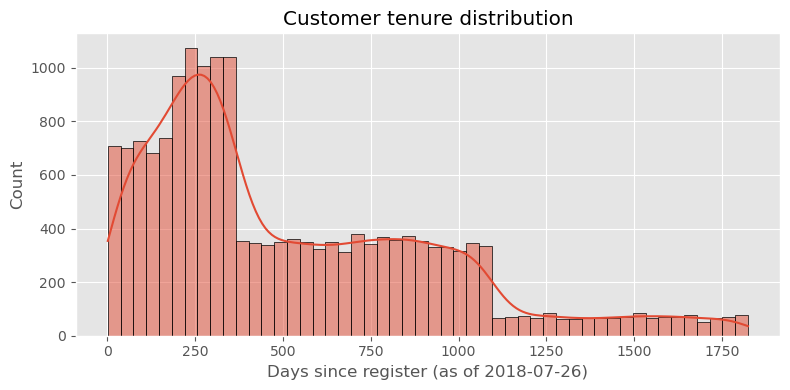

In [9]:
plt.figure(figsize=(8,4))
sns.histplot(profiles['days_since_register'].dropna(), bins=50, edgecolor='k', kde=True)  # add kde=True if you want the density curve
plt.xlabel('Days since register (as of 2018-07-26)')
plt.ylabel('Count')
plt.title('Customer tenure distribution')
plt.tight_layout()
plt.show()

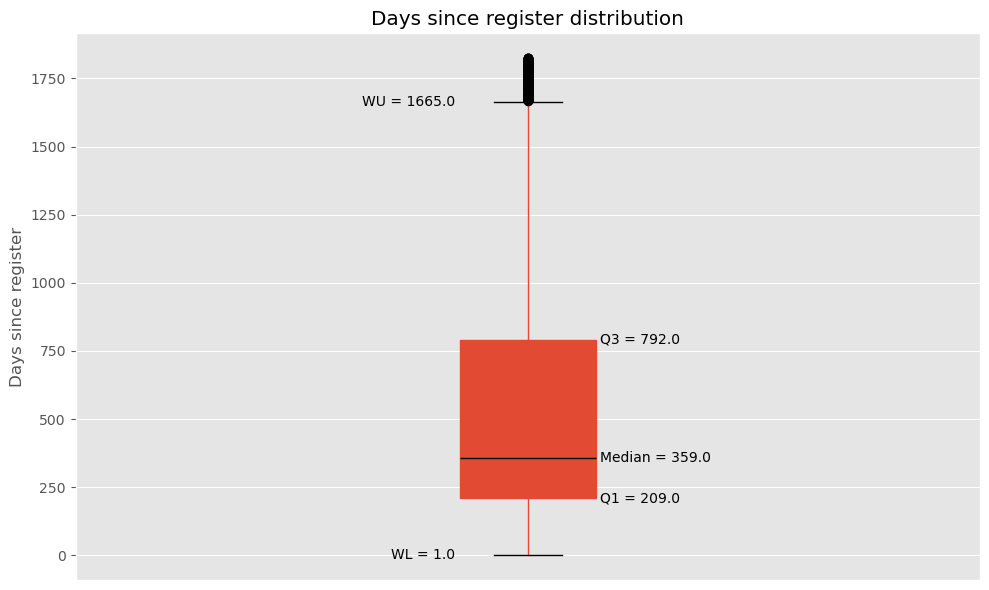

In [10]:
s = profiles['days_since_register'].dropna()
q1, med, q3 = s.quantile([0.25, 0.5, 0.75])
iqr = q3 - q1
lower_whisker = s[s >= q1 - 1.5 * iqr].min()
upper_whisker = s[s <= q3 + 1.5 * iqr].max()

fig, ax = plt.subplots(figsize=(10, 6))
profiles.boxplot(
    column='days_since_register',
    ax=ax,
    patch_artist=True,
    medianprops=dict(color='black'),
)

x = 1
dx = 0.08

ax.text(x + dx, q1, f"Q1 = {q1:.1f}", va='center')
ax.text(x + dx, med, f"Median = {med:.1f}", va='center')
ax.text(x + dx, q3, f"Q3 = {q3:.1f}", va='center')
ax.text(x - dx, lower_whisker, f"WL = {lower_whisker:.1f}", va='center', ha='right')
ax.text(x - dx, upper_whisker, f"WU = {upper_whisker:.1f}", va='center', ha='right')

plt.title('Days since register distribution')
plt.xticks([]) 
plt.ylabel('Days since register')

plt.tight_layout()
plt.show()

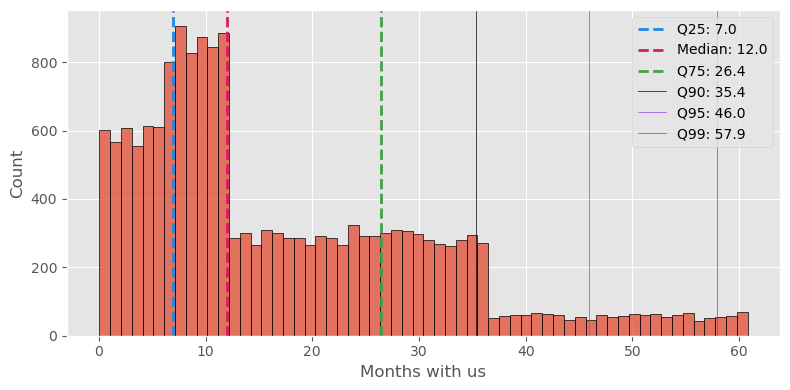

In [11]:
s = profiles['months_since_register']

fig, ax = plt.subplots(figsize=(8,4))
sns.histplot(s, bins=60, edgecolor='k', ax=ax)

q25, med, q75, q90, q95, q99 = s.quantile([0.25, 0.5, 0.75, .9, .95, .99])

for x, label, color in [
    (q25, 'Q25', '#1e88e5'),
    (med,  'Median', '#d81b60'),
    (q75, 'Q75', '#43a047'),
]:
    ax.axvline(x, color=color, linestyle='--', linewidth=2, label=f'{label}: {x:.1f}')

for x, label, color in [
    (q90, 'Q90', '#000000'),
    (q95, 'Q95', '#9542f5'),
    (q99, 'Q99', '#4257f5'),
]:
    ax.axvline(x, color=color, linestyle='-', linewidth=.5, label=f'{label}: {x:.1f}')

ax.legend()
ax.set_xlabel('Months with us')
ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

In [12]:
profiles['is_new_customer'] = (profiles['months_since_register'] <= 8)
profiles['is_continuous_customer'] = ((profiles['months_since_register'] > 8) & (profiles['months_since_register'] <= 12))
profiles['is_tenured_customer'] = ((profiles['months_since_register'] > 12) & (profiles['months_since_register'] <= 26))
profiles['is_high_tenured_customer'] = ((profiles['months_since_register'] > 26) & (profiles['months_since_register'] <= 46))
profiles['is_extreme_tenured_customer'] = ((profiles['months_since_register'] > 46) & (profiles['months_since_register'] <= 57))

# Offers

- id (string): id da oferta
- offer_type (string): o tipo da oferta (BOGO, discount, informational)
- min_value (int): valor mínimo para ativação da oferta
- duration (int): duração da oferta
- discount_value (int): valor do desconto
- channels (list of strings): canais de veiculação


**Notas**
- Assumindo duration como dias

**Perguntas preliminares**

- temos quantas ofertas?
- quais os canais de distribuição?
- qual a distribuição das ofertas?
- qual o maior/menor desconto?

In [13]:
offers.head()

,channels,min_value,duration,id,offer_type,discount_value,category
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,0
1,"[web, email, mobile, social]",10,5,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,1
2,"[web, email, mobile]",0,4,3f207df678b143eea3cee63160fa8bed,informational,0,2
3,"[web, email, mobile]",5,7,9b98b8c7a33c4b65b9aebfe6a799e6d9,bogo,5,3
4,"[web, email]",20,10,0b1e1539f2cc45b7b9fa7c272da2e1d7,discount,5,4


In [14]:
duplicate_ids = offers['id'].duplicated().sum()
if duplicate_ids > 0:
    print(f"There are {duplicate_ids} duplicate IDs in the 'id' column.")
else:
    print("There are no duplicate IDs in the 'id' column.")

print(f'Number of offers: {int(offers.id.count())}')

There are no duplicate IDs in the 'id' column.
Number of offers: 10


In [15]:
offers.offer_type.unique()

array(['bogo', 'informational', 'discount'], dtype=object)

In [16]:
category_names = offers['channels'].explode().dropna().unique().tolist()
category_names

['email', 'mobile', 'social', 'web']

In [17]:
offers['channels'].explode().value_counts()

channels
email     10
mobile     9
web        8
social     6
Name: count, dtype: int64

In [18]:
dummies = (
    pd.get_dummies(offers['channels'].explode())
      .groupby(level=0).max()
      .reindex(offers.index, fill_value=0)
      .reindex(columns=category_names, fill_value=0)
)

offers = offers.join(dummies.add_prefix('has_'))

In [19]:
offers.discount_value.describe()

count    10.000000
mean      4.200000
std       3.583915
min       0.000000
25%       2.000000
50%       4.000000
75%       5.000000
max      10.000000
Name: discount_value, dtype: float64

# Transactions

- event (str): descrição do evento (transação, oferta recebida, etc.)
- account_id (str): id do cliente
- time_since_test_start (int): tempo desde o começo do teste em dias (t=0)
- value (json): registra offer_id, desconto (reward) ou valor da transação

**Perguntas preliminares**
- temos quantas transações?
- quantas transações por evento?
- tempo desde o início do teste?


In [20]:
transactions.head()

,event,account_id,time_since_test_start,amount,offer_id,reward
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0.0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,offer received,a03223e636434f42ac4c3df47e8bac43,0.0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN
2,offer received,e2127556f4f64592b11af22de27a7932,0.0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0.0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN
4,offer received,68617ca6246f4fbc85e91a2a49552598,0.0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN


In [21]:
transactions.event.value_counts()

event
transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: count, dtype: int64

In [22]:
transactions.time_since_test_start.describe()

count    306534.000000
mean         15.265956
std           8.346930
min           0.000000
25%           7.750000
50%          17.000000
75%          22.000000
max          29.750000
Name: time_since_test_start, dtype: float64

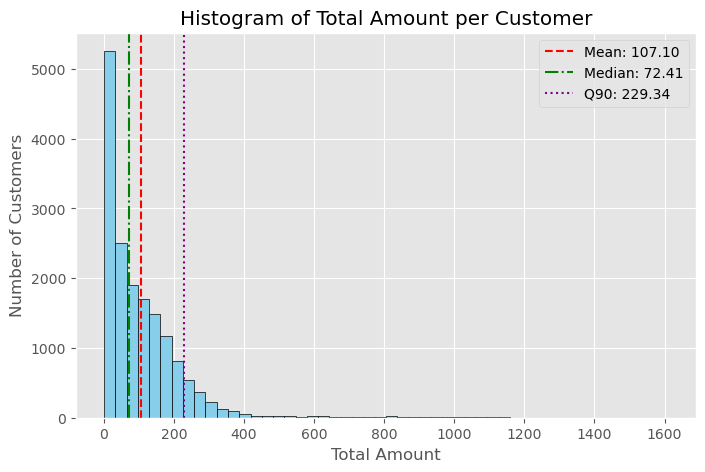

In [23]:
amount_sum = (
    transactions[transactions.event == 'transaction'].groupby(['account_id'])['amount']
    .sum()
    .reset_index(name='total_amount')
)

plt.figure(figsize=(8, 5))
plt.hist(amount_sum['total_amount'], bins=50, color='skyblue', edgecolor='black')
mean_val = amount_sum['total_amount'].mean()
median_val = amount_sum['total_amount'].median()
q90_val = amount_sum['total_amount'].quantile(0.9)

plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
plt.axvline(median_val, color='green', linestyle='-.', label=f'Median: {median_val:.2f}')
plt.axvline(q90_val, color='purple', linestyle=':', label=f'Q90: {q90_val:.2f}')

plt.xlabel('Total Amount')
plt.ylabel('Number of Customers')
plt.title('Histogram of Total Amount per Customer')
plt.legend()
plt.show()


In [24]:
data = transactions.merge(
    profiles.add_prefix('profile_'), left_on='account_id', right_on='profile_id', how='left'
).merge(
    offers.add_prefix('offer_'), left_on='offer_id', right_on='offer_id', how='left',
)
data.head()


,event,account_id,time_since_test_start,amount,offer_id,reward,profile_age,profile_registered_on,profile_gender,profile_id,profile_credit_card_limit,profile_days_since_register,profile_months_since_register,profile_is_new_customer,profile_is_continuous_customer,profile_is_tenured_customer,profile_is_high_tenured_customer,profile_is_extreme_tenured_customer,offer_channels,offer_min_value,offer_duration,offer_offer_type,offer_discount_value,offer_category,offer_has_email,offer_has_mobile,offer_has_social,offer_has_web
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0.0,NaN,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,75,2017-05-09,F,78afa995795e4d85b5d9ceeca43f5fef,100000.0,444,14.8,False,False,True,False,False,"[web, email, mobile]",5.0,7.0,bogo,5.0,3.0,True,True,False,True
1,offer received,a03223e636434f42ac4c3df47e8bac43,0.0,NaN,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN,118,2017-08-04,None,a03223e636434f42ac4c3df47e8bac43,NaN,357,11.9,False,True,False,False,False,"[web, email]",20.0,10.0,discount,5.0,4.0,True,False,False,True
2,offer received,e2127556f4f64592b11af22de27a7932,0.0,NaN,2906b810c7d4411798c6938adc9daaa5,NaN,68,2018-04-26,M,e2127556f4f64592b11af22de27a7932,70000.0,92,3.066667,True,False,False,False,False,"[web, email, mobile]",10.0,7.0,discount,2.0,9.0,True,True,False,True
3,offer received,8ec6ce2a7e7949b1bf142def7d0e0586,0.0,NaN,fafdcd668e3743c1bb461111dcafc2a4,NaN,118,2017-09-25,None,8ec6ce2a7e7949b1bf142def7d0e0586,NaN,305,10.166667,False,True,False,False,False,"[web, email, mobile, social]",10.0,10.0,discount,2.0,6.0,True,True,True,True
4,offer received,68617ca6246f4fbc85e91a2a49552598,0.0,NaN,4d5c57ea9a6940dd891ad53e9dbe8da0,NaN,118,2017-10-02,None,68617ca6246f4fbc85e91a2a49552598,NaN,298,9.933333,False,True,False,False,False,"[web, email, mobile, social]",10.0,5.0,bogo,10.0,1.0,True,True,True,True


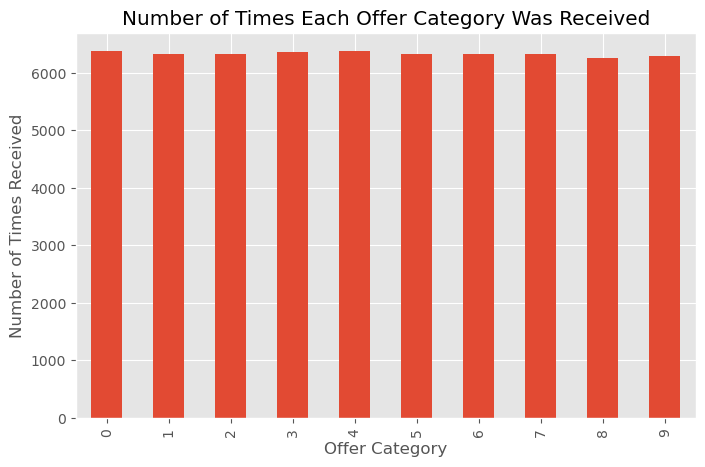

In [25]:
customer_offers_received = (
    transactions[transactions.event == "offer received"]
    .groupby('account_id')['offer_id']
    .unique()
    .reset_index(name='offers_received')
)

all_offers = customer_offers_received['offers_received'].explode()
offer_counts = all_offers.value_counts()

offer_ids = offer_counts.index
offer_categories = offers.set_index('id').loc[offer_ids, 'category']
category_counts = offer_counts.groupby(offer_categories).sum()

plt.figure(figsize=(8, 5))
category_counts.plot(kind='bar')
plt.xlabel('Offer Category')
plt.ylabel('Number of Times Received')
plt.title('Number of Times Each Offer Category Was Received')
plt.show()